

# Project: Investigate a Dataset of medical appointments in Brazil.  


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

* ‘ScheduledDay’ tells us on what day the patient set up their appointment.

* ‘Neighborhood’ indicates the location of the hospital.

* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

**The main question for this dataset is: What factors are important to know in order to predict if a patient will show up for their scheduled appointment?**

To find an answer to this question I'll go through more specific questions such as:

* What percent of patients not show up to an appointment?
* Patients with what kind of characteristics are more tend to not come to an appointment?
* What average age of patients who don't show up? Does average age differ in genders?
* Does percent of "no show" cases is different for gender?
* Does percent of "no show" cases depend on neighbourhood?
* Does "no show" cases depend on the gap between scheduled day and appointment day?
* Does sms help patients to attend an appointment or not?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('no_show_appointments.csv')
df.shape

(110527, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#checking for duplicates in the data
sum(df.duplicated())

0

### Data Cleaning 
* Change column names to lower case
* Remane some columns
* Change data type for columns with dates

In [5]:
#columns to lowercase  
df.columns = df.columns.str.lower()

In [6]:
#rename columns with adding '_' where needed
df = df.rename({'patientid':'patient_id','appointmentid':'appt_id','scheduledday':'sched_day','appointmentday':'appt_day','no-show':'no_show'}, axis="columns")

In [7]:
#change data type for Scheduled dates
df['sched_day'] = pd.to_datetime(df['sched_day'])
#change data type for Appointment dates
df['appt_day'] = pd.to_datetime(df['appt_day'])

In [8]:
#check for changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   patient_id     110527 non-null  float64            
 1   appt_id        110527 non-null  int64              
 2   gender         110527 non-null  object             
 3   sched_day      110527 non-null  datetime64[ns, UTC]
 4   appt_day       110527 non-null  datetime64[ns, UTC]
 5   age            110527 non-null  int64              
 6   neighbourhood  110527 non-null  object             
 7   scholarship    110527 non-null  int64              
 8   hipertension   110527 non-null  int64              
 9   diabetes       110527 non-null  int64              
 10  alcoholism     110527 non-null  int64              
 11  handcap        110527 non-null  int64              
 12  sms_received   110527 non-null  int64              
 13  no_show        110527 non-nul

In [9]:
#brief dataset review
df.describe()

,patient_id,appt_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**There are two suspicious ages -1 and 115. Let's investigate them and figuer out what to do with them.**

In [10]:
#looking for rows with age -1
df.query('age == -1')

,patient_id,appt_id,gender,sched_day,appt_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


There is a mark that a patient showed up for an appointment. Presumably there has been made a mistake at filling an age cell. I assume that it was an infant thus I'll change this age cell to 0.

In [11]:
#replace age -1 with 0
df.loc[99832, 'age'] = 0

In [12]:
#check replacement     
df['age'].min()

0

In [13]:
#looking for rows with age 115
df.query('age == 115')

,patient_id,appt_id,gender,sched_day,appt_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


There are 5 rows with two different patient ID. One of them have a hypertension and the other is handicap, both of them came to an appointment once. It looks as real senior patients so I'll keep this rows in dataset.

**Let's check for what period of time we have information in our dataset.**

In [14]:
appt_day_min = df['appt_day'].min()
appt_day_max = df['appt_day'].max()
appt_period = appt_day_max - appt_day_min

print ('The dataset have information about appointments for period of {}.'.format(appt_period))

The dataset have information about appointments for period of 40 days 00:00:00.


<a id='eda'></a>
## Exploratory Data Analysis

### What percent of patients not show up to an appointment?

In [15]:
#calculate totals
total_no_show = df[df['no_show'] == 'Yes'].shape[0]
total_show_up = df[df['no_show'] == 'No'].shape[0]

In [16]:
#calculate percent of no show cases
no_show_pct = round(total_no_show/total_show_up*100)
no_show_pct

25

> **According to dataset - 25% of appointments are "no show".**

### Patients with what kind of characteristics are more tend to not come to an appointment?

In [17]:
# mean health characteristics of patients
char = ['scholarship','hipertension','diabetes','alcoholism','handcap']
mean_health = df.groupby(['no_show']).mean()[char]
mean_health

,scholarship,hipertension,diabetes,alcoholism,handcap
no_show,,,,,
No,0.093903,0.204392,0.073837,0.030417,0.022742
Yes,0.115507,0.169004,0.064071,0.030333,0.020297


**Bar graph to visualise findings:**

In [18]:
ind = np.arange(5)  # the x locations for the groups
width = 0.35       # the width of the bars

print(ind)

[0 1 2 3 4]


In [19]:
show_up_health = [0.093903, 0.204392, 0.073837, 0.030417, 0.022742]
no_show_health = [0.115507, 0.169004, 0.064071, 0.030333, 0.020297]

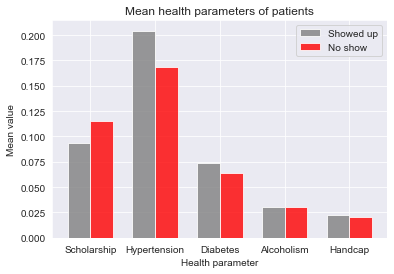

In [20]:
# plot bars
show_up_bars = plt.bar(ind, show_up_health, width, color='grey', alpha=.8, label='Showed up')
no_show_bars = plt.bar(ind + width, no_show_health, width, color='red', alpha=.8, label='No show')

# title and labels
plt.ylabel('Mean value')
plt.xlabel('Health parameter')
plt.title('Mean health parameters of patients')
locations = ind + width / 2  # xtick locations
labels = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

> **The graph shows us that people with *scholarship* are more tend to not came to an appointments.**
>
> Patients with *hypertension* and *diabetes* are opposite.
>
> *Alcoholism* and *handicap* doesn't seems to effects on showing up at an appointment.

## What average age of patients who don't show up? Does average age differ in genders?
I'll look at **median** age because of two patiens at 115 age may affect at **mean** value.

In [21]:
#creating the data frame with patients who didn't came
df_no_show = df[df['no_show'] == 'Yes'] 
df_no_show.shape

(22319, 14)

In [22]:
#creating the data frame with patients who came
df_show_up = df[df['no_show'] == 'No']
df_show_up.shape

(88208, 14)

In [23]:
# median age of "showed up" patients
column = ['age']
median_age_show_up = df_show_up.groupby(['gender']).median()[column]
median_age_show_up = round(median_age_show_up['age'])
median_age_show_up

gender
F    40.0
M    34.0
Name: age, dtype: float64

In [24]:
# median age of "no show" patients
median_age_no_show = df_no_show.groupby(['gender']).median()[column]
median_age_no_show = round(median_age_no_show['age'])
median_age_no_show 

gender
F    34
M    28
Name: age, dtype: int64

**Bar graph to visualise findings:**

In [25]:
ind = np.arange(len(median_age_show_up))  # the x locations for the groups
width = 0.2       # the width of the bars

print(ind)

[0 1]


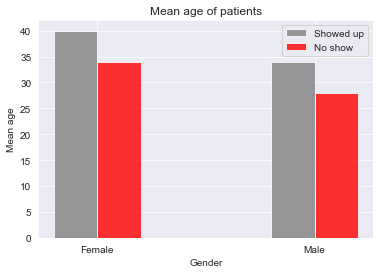

In [26]:
# plot bars
show_up_bars = plt.bar(ind, median_age_show_up, width, color='grey', alpha=.8, label='Showed up')
no_show_bars = plt.bar(ind + width, median_age_no_show, width, color='red', alpha=.8, label='No show')

# title and labels
plt.ylabel('Mean age')
plt.xlabel('Gender')
plt.title('Mean age of patients')
locations = ind + width / 2  # xtick locations
labels = ['Female', 'Male']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

>**Younger patients are tend to not show up at an appointment.**
>* Average age depends on gender.

## Does percent of "no show" cases is different for gender?

In [27]:
#count total females and total males in df_no_show
no_show_f = len(df_no_show[df_no_show['gender'] == 'F'])
no_show_m = len(df_no_show[df_no_show['gender'] == 'M'])

print ('There are {} females and {} males at no show dataframe.'.format(no_show_f, no_show_m))

There are 14594 females and 7725 males at no show dataframe.


In [28]:
#count total females and total males in df_show_up
show_up_f = len(df_show_up[df_show_up['gender']=='F'])
show_up_m = len(df_show_up[df_show_up['gender']=='M'])

print ('There are {} females and {} males at no show dataframe.'.format(show_up_f, show_up_m))

There are 57246 females and 30962 males at no show dataframe.


In [29]:
pct_no_show_f = round((no_show_f/show_up_f*100),1)
pct_no_show_m = round((no_show_m/show_up_m*100),1)

print ("The proportion of females who didn't show up at the appointment is {}% and males - {}%."
       .format(pct_no_show_f, pct_no_show_m))

The proportion of females who didn't show up at the appointment is 25.5% and males - 24.9%.


**Line graph to visualise findings:**

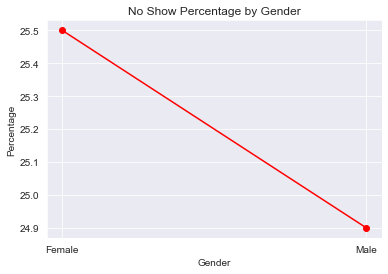

In [30]:
plt.plot(['Female', 'Male'],[pct_no_show_f, pct_no_show_m], 'r-o', linewidth=1.5)


plt.title('No Show Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

> **Percentage of women who don't show up at an appointment a bit higher than percentage of men.**

## Does percent of "no show" cases depend on neighbourhood?

In [31]:
#count no show appointments by Neighbourhood
nbhd_no_show = df_no_show.groupby('neighbourhood').count()['appt_day']
nbhd_no_show.head()

neighbourhood
AEROPORTO                1
ANDORINHAS             521
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
Name: appt_day, dtype: int64

In [32]:
#count occurred appointments by Neighbourhood
nbhd_show_up = df_show_up.groupby('neighbourhood').count()['appt_day']
nbhd_show_up.head()

neighbourhood
AEROPORTO                 7
ANDORINHAS             1741
ANTÔNIO HONÓRIO         221
ARIOVALDO FAVALESSA     220
BARRO VERMELHO          332
Name: appt_day, dtype: int64

In [33]:
#count percentage of no show appointments and find Neighbourhood with highest proportion
nbhd_pct = nbhd_no_show/nbhd_show_up*100
print((nbhd_pct.idxmax()), (round((nbhd_pct.max()), 1)))

SANTOS DUMONT 40.7


>**About 40% of appointments in SANTOS DUMONT are no show.**

**Let's make a list of neighbourhoods with no show appointments higher than 35%.**

In [34]:
#create dateframe for proportion of noshow and rename column
df_pct = pd.DataFrame(nbhd_pct)
df_pct = df_pct.rename({'appt_day':'pct_no_show'}, axis="columns")
df_pct.head(3)

,pct_no_show
neighbourhood,
AEROPORTO,14.285714
ANDORINHAS,29.925330
ANTÔNIO HONÓRIO,22.624434


In [35]:
#list of Neighbourhoods with percentage of no show higher than 35
worst_nbhd = df_pct.query('pct_no_show >= 35')
worst_nbhd

,pct_no_show
neighbourhood,
ITARARÉ,35.623311
SANTA CECÍLIA,37.846154
SANTA CLARA,36.021505
SANTOS DUMONT,40.683572


**Line graph to visualise findings:**

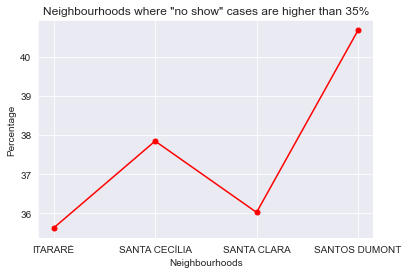

In [36]:
plt.plot(['ITARARÉ', 'SANTA CECÍLIA', 'SANTA CLARA', 'SANTOS DUMONT'], 
         [35.623311, 37.846154, 36.021505, 40.683572], 'ro-', linewidth=1.5, markersize=5)


plt.title('Neighbourhoods where "no show" cases are higher than 35%')
plt.xlabel('Neighbourhoods')
plt.ylabel('Percentage')

plt.show()

## Does "no show" cases depend on the gap between scheduled day and appointment day?

In [37]:
#calculate gap for "no show" casess
date_diff_no_show = df_no_show['appt_day'] - df_no_show['sched_day']
date_diff_no_show.median()

Timedelta('10 days 07:42:31')

In [38]:
#calculate gap for "showed up" casess
date_diff_show_up = df_show_up['appt_day'] - df_show_up['sched_day']
date_diff_show_up.median()

Timedelta('1 days 14:56:44')

Bar graph to visualise findings:

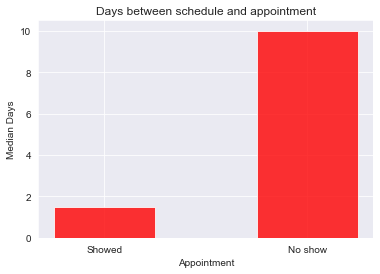

In [39]:
plt.bar([1, 2], [1.5, 10], width=0.5, color='red', alpha=.8, tick_label=['Showed', 'No show'])
plt.title('Days between schedule and appointment')
plt.xlabel('Appointment')
plt.ylabel('Median Days');

> **If the gap between schedule an appointment about 10 days the "no show" is more possible.**

## Does sms help patients to attend an appointment or not?

In [40]:
#checking whether sms helps or not
#calculate total of received sms 
sms_total = df.query('sms_received == 1')['sms_received'].count()
sms_total

35482

In [41]:
#calculate percent of patients who has received sms and didn't came
no_show_sms = df_no_show.query('sms_received == 1')['sms_received'].count()
no_show_sms_pct = round(no_show_sms/sms_total*100)
no_show_sms_pct

28

In [42]:
#calculate percent of patients who has received sms and came
show_up_sms = df_show_up.query('sms_received == 1')['sms_received'].count()
show_up_sms_pct = round(show_up_sms/sms_total*100)
show_up_sms_pct

72

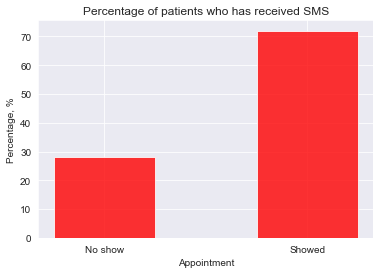

In [43]:
plt.bar([1, 2], [28, 72], width=0.5, color='red', alpha=.8, tick_label=['No show', 'Showed'])
plt.title('Percentage of patients who has received SMS')
plt.xlabel('Appointment')
plt.ylabel('Percentage, %');

>**It seems that sms are working!**
>
>  70% of patients came to an appointment after receiving SMS.

<a id='conclusions'></a>
## Conclusions

**According to dataset we may conclude:**

* Patients with *scholarship* are more tend to not came to an appointments.
  Patients with *hypertension* and *diabetes* are the opposite.
  When *alcoholism* and *handicap* doesn't seems to effects on showing up at an appointment.


* Patients who are younger than 35 age are more tend to not show at an appointment. Median age of female patients who don't show up at an appointment is 34, when median age of male patients is 28. 


* Percentage of women who don't show up at an appointment (25.5%) is a bit higher than percentage of men (25%).


* Neighbourhoods where "no show" cases are more than 35%
    * SANTOS DUMONT	(40.7%)
    * SANTA CECÍLIA	(37.9%)
    * SANTA CLARA	(36.1%)
    * ITARARÉ	(35.7%)
    

* Than bigger gap between schedule an appointment than more possible that patient won't come. Average gap for "no show" cases is 10 days.


* SMS help to patients to remember to come to an appointment, 70% of patients came to an appointment after receiving SMS.

**Also the dataset has limitations for proper analysis such as:**

* The dataset includes information for short period of time by way of 40 days.
* We don't know much about characteristics of patients (e.g. when patient was diagnosed) except they are exist.
* We don't know the reason of an appointment which may affect to patient's decision to come or not.